<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/CREDIT_RISK_ASSESSMENT__WITH_GENERATIVE_I_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating credit data...
Generated 13727 samples
Default rate: 0.001

Dataset Summary:
                age         income  credit_score  debt_to_income  \
count  13727.000000   13727.000000  13727.000000    13727.000000   
mean      46.292188   51645.757255    650.236236        0.574022   
std       13.813658   44657.707381    100.151165        0.316643   
min       18.026779   10002.316041    203.439614        0.003403   
25%       36.158431   23065.346300    581.828408        0.325014   
50%       45.657432   38045.168188    650.240722        0.534010   
75%       55.503238   64400.190124    718.588780        0.784716   
max      103.893566  475584.264165   1022.783334        1.791902   

       years_employed  credit_utilization  num_credit_lines  recent_inquiries  \
count    13727.000000        13727.000000      13727.000000      13727.000000   
mean         4.027777            0.398392          8.011802          1.492314   
std          2.847965            0.199620          2.824

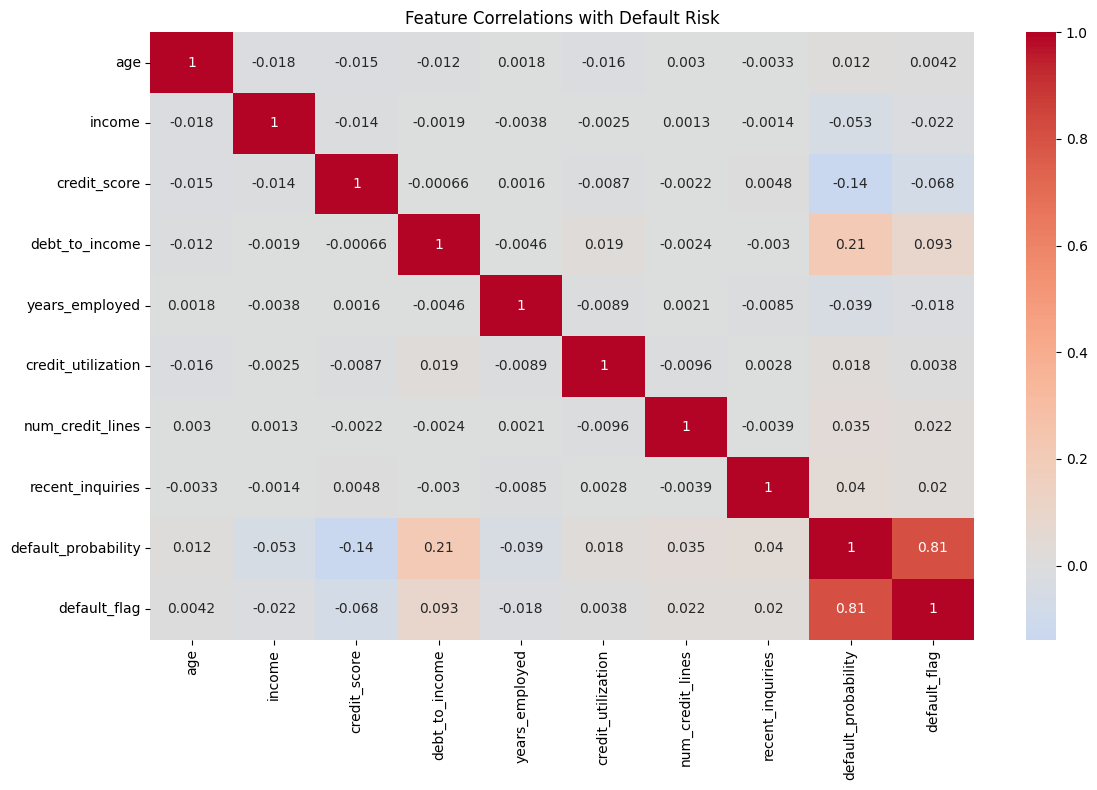

Preparing training data...
Training samples: 9608
Validation samples: 1373
Test samples: 2746
Default rate in training: 0.001
Training the model...
Using device: cuda
Starting training...
Epoch   0: Train Loss = 6.5927, Val Loss = 4.1415, Val Acc = 0.9985
Epoch  10: Train Loss = 3.9369, Val Loss = 3.1037, Val Acc = 0.9985
Early stopping at epoch 15
Best validation accuracy: 0.9985


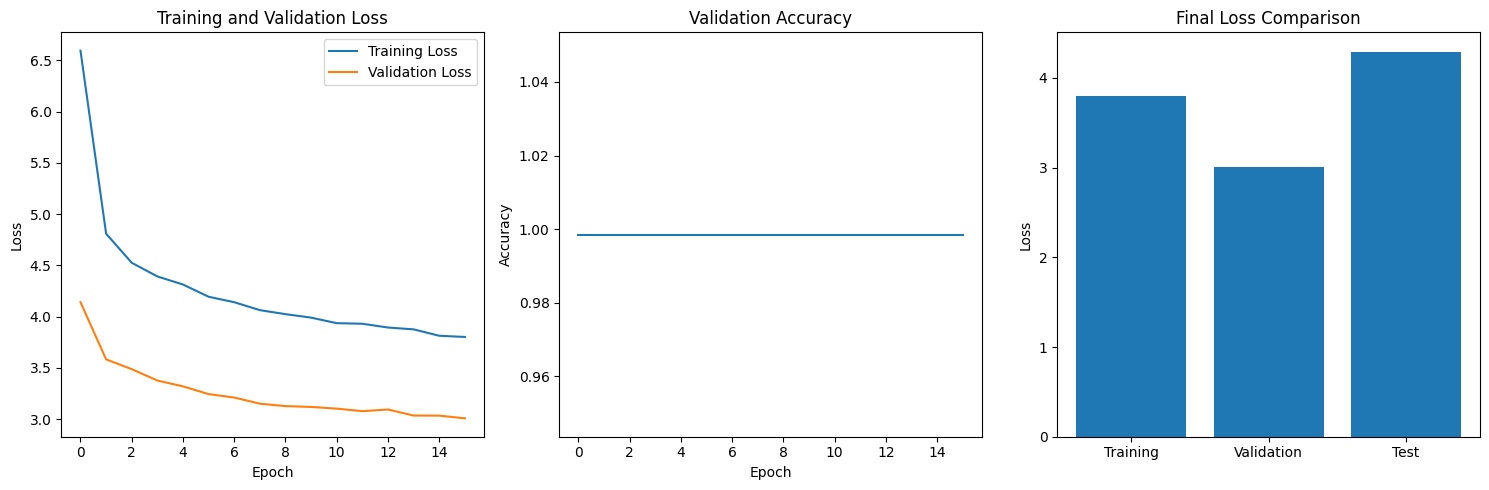

Final Test Accuracy: 0.9989
Generating and analyzing synthetic data...


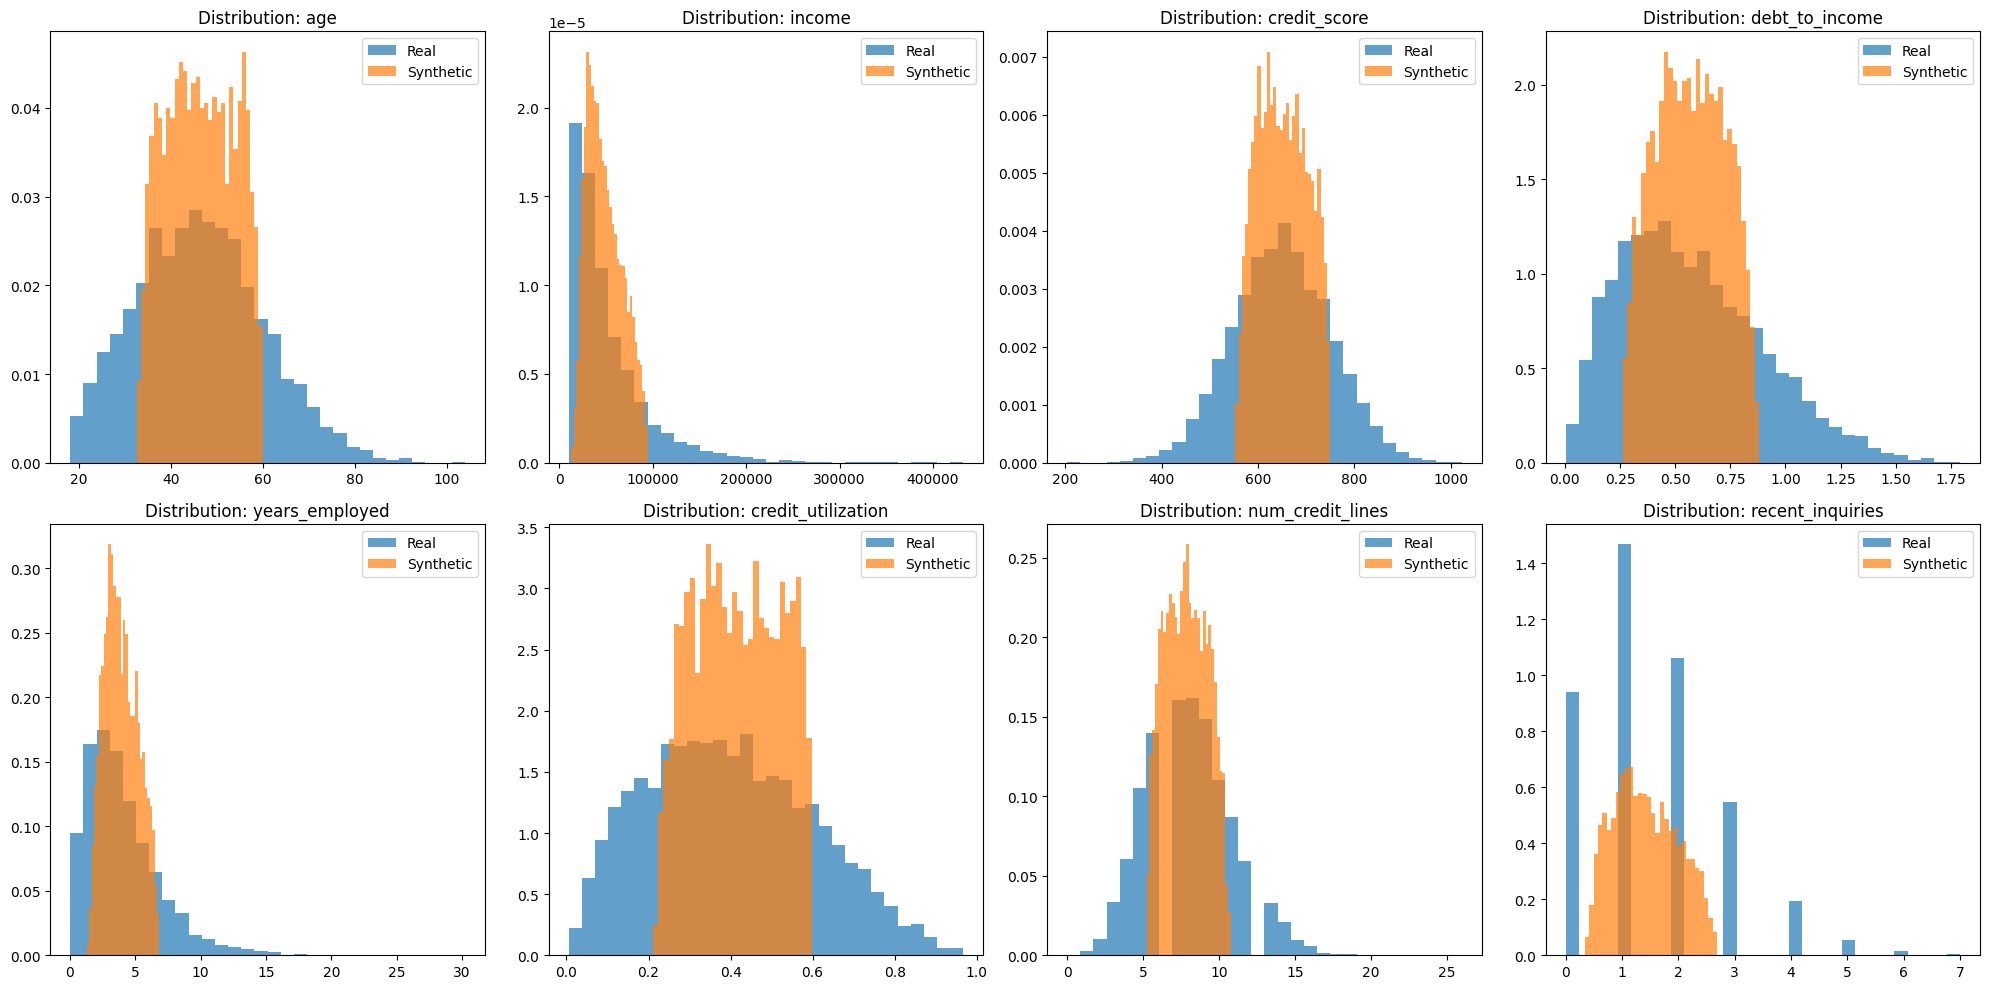

Statistical Comparison (Real vs Synthetic):
              Feature   Real_Mean    Synth_Mean  Mean_Diff    Real_Std  \
0                 age     46.2503     46.414001     0.1637     13.7346   
1              income  52410.1245  48497.382812  3912.7417  45557.2851   
2        credit_score    648.6486    651.333191     2.6846    102.2326   
3      debt_to_income      0.5727      0.568900     0.0038      0.3199   
4      years_employed      4.0431      3.920100     0.1229      2.8704   
5  credit_utilization      0.3990      0.415000     0.0160      0.2019   
6    num_credit_lines      8.0520      7.866900     0.1851      2.8225   
7    recent_inquiries      1.4912      1.428100     0.0631      1.2082   

    Synth_Std    Std_Diff  
0      7.2136      6.5211  
1  18813.1035  26744.1816  
2     50.0382     52.1944  
3      0.1537      0.1662  
4      1.2614      1.6091  
5      0.1023      0.0997  
6      1.3676      1.4549  
7      0.5624      0.6459  
Synthetic data default rate: 0.000
Pe

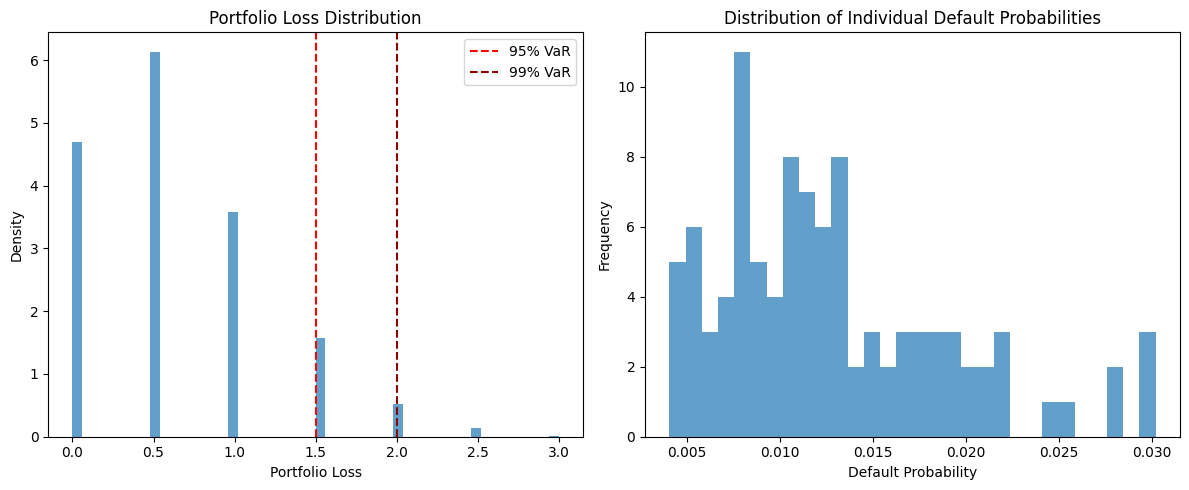

Performing comprehensive model evaluation...
COMPREHENSIVE MODEL EVALUATION
Test Accuracy: 0.9989
Test AUC: 0.5004

Classification Report:
              precision    recall  f1-score   support

 Non-Default       1.00      1.00      1.00      2743
     Default       0.00      0.00      0.00         3

    accuracy                           1.00      2746
   macro avg       0.50      0.50      0.50      2746
weighted avg       1.00      1.00      1.00      2746



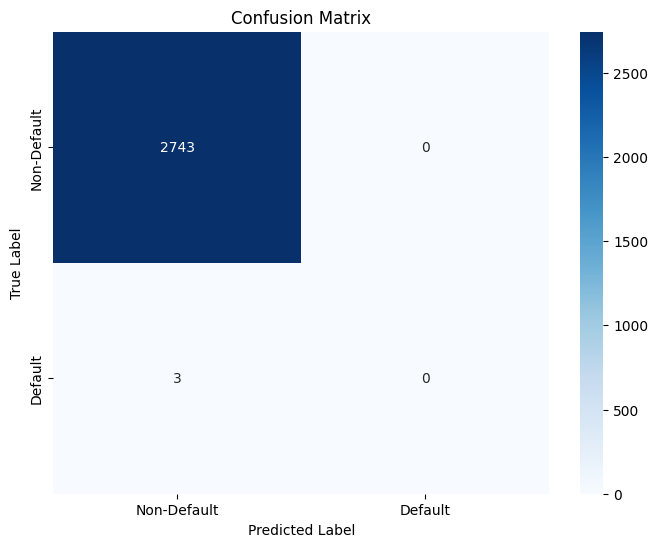

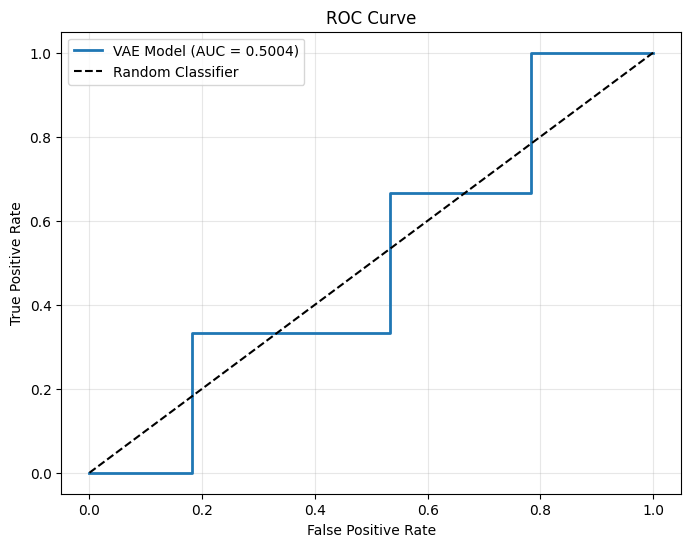

Creating ensemble model...
Training ensemble model 1/3...
Training ensemble model 2/3...
Training ensemble model 3/3...
Created ensemble of 3 models
ENSEMBLE MODEL EVALUATION
Ensemble Accuracy: 0.9989
Ensemble AUC: 0.9987

CREDIT RISK ASSESSMENT WITH GENERATIVE AI - COMPLETE
SUMMARY:
- Single Model Test Accuracy: 0.9989
- Ensemble Model Test Accuracy: 0.9989
- Ensemble Model Test AUC: 0.9987
- Synthetic Data Quality: 0.000 default rate


In [3]:
# =============================================================================
# CREDIT RISK ASSESSMENT WITH GENERATIVE AI - COMPLETE IMPLEMENTATION
# =============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# =============================================================================
# 1. DATA GENERATION
# =============================================================================

class CreditDataGenerator:
    """Generate synthetic credit data for demonstration"""

    def __init__(self, n_samples=10000):
        self.n_samples = n_samples

    def generate_realistic_credit_data(self):
        """Generate realistic credit assessment data with complex relationships"""

        np.random.seed(42)

        # Basic demographic and financial features
        age = np.random.normal(45, 15, self.n_samples)
        income = np.random.lognormal(10.5, 0.8, self.n_samples)
        credit_score = np.random.normal(650, 100, self.n_samples)
        debt_to_income = np.random.beta(2, 5, self.n_samples) * 2
        years_employed = np.random.gamma(2, 2, self.n_samples)
        credit_utilization = np.random.beta(2, 3, self.n_samples)
        num_credit_lines = np.random.poisson(8, self.n_samples)
        recent_inquiries = np.random.poisson(1.5, self.n_samples)

        # Create complex relationships for default probability
        default_log_odds = (
            -4.0
            + 0.02 * age
            - 0.000015 * income
            - 0.02 * credit_score
            + 8.0 * debt_to_income
            - 0.3 * years_employed
            + 4.0 * credit_utilization
            + 0.1 * num_credit_lines
            + 0.5 * recent_inquiries
            + 0.001 * age * debt_to_income  # Interaction term
            - 0.0001 * income * credit_utilization  # Interaction term
        )

        # Add some noise
        default_log_odds += np.random.normal(0, 0.8, self.n_samples)

        # Convert to probabilities
        default_probability = 1 / (1 + np.exp(-default_log_odds))

        # Generate binary default labels
        default_flag = (default_probability > 0.5).astype(int)

        # Create DataFrame
        data = pd.DataFrame({
            'age': age,
            'income': income,
            'credit_score': credit_score,
            'debt_to_income': debt_to_income,
            'years_employed': years_employed,
            'credit_utilization': credit_utilization,
            'num_credit_lines': num_credit_lines,
            'recent_inquiries': recent_inquiries,
            'default_probability': default_probability,
            'default_flag': default_flag
        })

        # Remove extreme values
        data = data[(data['income'] > 10000) & (data['income'] < 500000)]
        data = data[data['age'] >= 18]

        print(f"Generated {len(data)} samples")
        print(f"Default rate: {data['default_flag'].mean():.3f}")

        return data

# Generate and explore the data
print("Generating credit data...")
data_gen = CreditDataGenerator(n_samples=15000)
credit_data = data_gen.generate_realistic_credit_data()

# Display data summary
print("\nDataset Summary:")
print(credit_data.describe())

# Plot correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = credit_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations with Default Risk')
plt.tight_layout()
plt.show()

# =============================================================================
# 2. VAE MODEL ARCHITECTURE
# =============================================================================

class CreditRiskVAE(nn.Module):
    """
    Variational Autoencoder for credit risk assessment
    Combines feature learning with risk classification
    """

    def __init__(self, input_dim, hidden_dim=256, latent_dim=32, num_classes=2):
        super(CreditRiskVAE, self).__init__()

        self.input_dim = input_dim
        self.latent_dim = latent_dim

        # Encoder network
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        # Latent space parameters
        self.fc_mu = nn.Linear(hidden_dim // 2, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim // 2, latent_dim)

        # Decoder network
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim // 2, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, input_dim),
            nn.Tanh()
        )

        # Risk classifier on latent space
        self.risk_classifier = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def encode(self, x):
        """Encode input to latent parameters"""
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_logvar(h)

    def reparameterize(self, mu, logvar):
        """Reparameterization trick for sampling"""
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        """Decode latent representation back to input space"""
        return self.decoder(z)

    def forward(self, x):
        """Full forward pass"""
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstruction = self.decode(z)
        risk_logits = self.risk_classifier(z)
        return reconstruction, mu, logvar, risk_logits

    def generate_synthetic_samples(self, n_samples, device='cpu'):
        """Generate synthetic credit applicants"""
        with torch.no_grad():
            z = torch.randn(n_samples, self.latent_dim).to(device)
            synthetic_samples = self.decode(z)
            risk_logits = self.risk_classifier(z)
            risk_proba = torch.softmax(risk_logits, dim=1)
        return synthetic_samples.cpu().numpy(), risk_proba.cpu().numpy()

# =============================================================================
# 3. TRAINING FRAMEWORK
# =============================================================================

class CreditRiskTrainer:
    """Training and evaluation framework for CreditRiskVAE"""

    def __init__(self, model, learning_rate=1e-3):
        self.model = model
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, patience=10, factor=0.5)

    def vae_loss(self, reconstruction, x, mu, logvar, beta=0.1):
        """Calculate VAE loss with controllable KL divergence weight"""
        reconstruction_loss = nn.functional.mse_loss(reconstruction, x, reduction='sum')
        kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return reconstruction_loss + beta * kl_divergence

    def train_epoch(self, data_loader, device):
        """Train for one epoch"""
        self.model.train()
        total_loss = 0
        total_classification_loss = 0

        for batch_idx, (data, targets) in enumerate(data_loader):
            data, targets = data.to(device), targets.to(device)

            self.optimizer.zero_grad()

            # Forward pass
            reconstruction, mu, logvar, risk_logits = self.model(data)

            # Calculate losses
            vae_loss = self.vae_loss(reconstruction, data, mu, logvar)
            classification_loss = nn.functional.cross_entropy(risk_logits, targets)

            # Combined loss
            loss = vae_loss + classification_loss

            # Backward pass
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()

            total_loss += loss.item()
            total_classification_loss += classification_loss.item()

        return total_loss / len(data_loader.dataset), total_classification_loss / len(data_loader)

    def evaluate(self, data_loader, device):
        """Evaluate model performance"""
        self.model.eval()
        total_loss = 0
        correct_predictions = 0
        total_samples = 0

        with torch.no_grad():
            for data, targets in data_loader:
                data, targets = data.to(device), targets.to(device)
                reconstruction, mu, logvar, risk_logits = self.model(data)

                loss = self.vae_loss(reconstruction, data, mu, logvar)
                total_loss += loss.item()

                # Calculate accuracy
                risk_proba = torch.softmax(risk_logits, dim=1)
                _, predicted = torch.max(risk_proba, 1)
                correct_predictions += (predicted == targets).sum().item()
                total_samples += targets.size(0)

        accuracy = correct_predictions / total_samples
        return total_loss / len(data_loader.dataset), accuracy

# =============================================================================
# 4. DATA PREPARATION
# =============================================================================

def prepare_training_data(credit_data, test_size=0.2, validation_size=0.1):
    """Prepare and scale the credit data for training"""

    # Select features and target
    feature_columns = ['age', 'income', 'credit_score', 'debt_to_income',
                      'years_employed', 'credit_utilization', 'num_credit_lines', 'recent_inquiries']

    X = credit_data[feature_columns].values
    y = credit_data['default_flag'].values

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_temp, X_test, y_temp, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42, stratify=y
    )

    val_size = validation_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size, random_state=42, stratify=y_temp
    )

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.LongTensor(y_val)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)

    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print(f"Test samples: {len(X_test)}")
    print(f"Default rate in training: {y_train.mean():.3f}")

    return (X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor,
            X_test_tensor, y_test_tensor, scaler, feature_columns)

print("Preparing training data...")
(X_train, y_train, X_val, y_val, X_test, y_test, scaler, feature_columns) = prepare_training_data(credit_data)

# Create data loaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# =============================================================================
# 5. MODEL TRAINING
# =============================================================================

def train_credit_risk_model(train_loader, val_loader, input_dim, epochs=100):
    """Train the credit risk VAE model"""

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Initialize model and trainer
    model = CreditRiskVAE(input_dim=input_dim, hidden_dim=128, latent_dim=16).to(device)
    trainer = CreditRiskTrainer(model, learning_rate=1e-3)

    # Training history
    train_losses = []
    val_losses = []
    val_accuracies = []

    best_val_accuracy = 0
    patience = 15
    patience_counter = 0

    print("Starting training...")
    for epoch in range(epochs):
        # Training
        train_loss, train_class_loss = trainer.train_epoch(train_loader, device)

        # Validation
        val_loss, val_accuracy = trainer.evaluate(val_loader, device)

        # Update learning rate
        trainer.scheduler.step(val_loss)

        # Save history
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Early stopping check
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            patience_counter = 0
            # Save best model
            torch.save(model.state_dict(), 'best_credit_risk_model.pth')
        else:
            patience_counter += 1

        if epoch % 10 == 0:
            print(f'Epoch {epoch:3d}: Train Loss = {train_loss:.4f}, '
                  f'Val Loss = {val_loss:.4f}, Val Acc = {val_accuracy:.4f}')

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

    # Load best model
    model.load_state_dict(torch.load('best_credit_risk_model.pth'))

    print(f"Best validation accuracy: {best_val_accuracy:.4f}")

    return model, trainer, train_losses, val_losses, val_accuracies

print("Training the model...")
input_dim = X_train.shape[1]
model, trainer, train_losses, val_losses, val_accuracies = train_credit_risk_model(
    train_loader, val_loader, input_dim, epochs=100
)

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 3, 2)
plt.plot(val_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')

plt.subplot(1, 3, 3)
# Final evaluation on test set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_loss, test_accuracy = trainer.evaluate(test_loader, device)
plt.bar(['Training', 'Validation', 'Test'],
        [train_losses[-1] if train_losses else 0, val_losses[-1] if val_losses else 0, test_loss])
plt.ylabel('Loss')
plt.title('Final Loss Comparison')

plt.tight_layout()
plt.show()

print(f"Final Test Accuracy: {test_accuracy:.4f}")

# =============================================================================
# 6. SYNTHETIC DATA GENERATION AND ANALYSIS
# =============================================================================

class SyntheticCreditAnalyzer:
    """Analyze and validate synthetic credit data generation"""

    def __init__(self, model, scaler, feature_columns):
        self.model = model
        self.scaler = scaler
        self.feature_columns = feature_columns
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def generate_and_analyze_synthetic_data(self, n_samples=5000):
        """Generate synthetic data and compare with real data"""

        # Generate synthetic samples
        synthetic_features, synthetic_risk = self.model.generate_synthetic_samples(n_samples, self.device)

        # Inverse transform to original scale
        synthetic_data_original = self.scaler.inverse_transform(synthetic_features)

        # Create DataFrame
        synthetic_df = pd.DataFrame(synthetic_data_original, columns=self.feature_columns)
        synthetic_df['default_probability'] = synthetic_risk[:, 1]
        synthetic_df['predicted_default'] = (synthetic_risk[:, 1] > 0.5).astype(int)

        return synthetic_df

    def compare_distributions(self, real_data, synthetic_data, n_features=4):
        """Compare distributions of real and synthetic data"""

        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        axes = axes.flatten()

        features_to_plot = self.feature_columns[:n_features*2]  # Plot first 8 features

        for i, feature in enumerate(features_to_plot):
            if i < len(axes):
                # Plot histograms
                axes[i].hist(real_data[feature], alpha=0.7, label='Real', bins=30, density=True)
                axes[i].hist(synthetic_data[feature], alpha=0.7, label='Synthetic', bins=30, density=True)
                axes[i].set_title(f'Distribution: {feature}')
                axes[i].legend()

        plt.tight_layout()
        plt.show()

        # Statistical comparison
        print("Statistical Comparison (Real vs Synthetic):")
        comparison_data = []
        for feature in self.feature_columns:
            real_mean = real_data[feature].mean()
            synth_mean = synthetic_data[feature].mean()
            real_std = real_data[feature].std()
            synth_std = synthetic_data[feature].std()

            comparison_data.append({
                'Feature': feature,
                'Real_Mean': real_mean,
                'Synth_Mean': synth_mean,
                'Mean_Diff': abs(real_mean - synth_mean),
                'Real_Std': real_std,
                'Synth_Std': synth_std,
                'Std_Diff': abs(real_std - synth_std)
            })

        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.round(4))

print("Generating and analyzing synthetic data...")
analyzer = SyntheticCreditAnalyzer(model, scaler, feature_columns)
synthetic_credit_data = analyzer.generate_and_analyze_synthetic_data(n_samples=5000)

# Compare with real data
real_data_sample = credit_data[feature_columns].iloc[:5000]  # Sample for fair comparison
analyzer.compare_distributions(real_data_sample, synthetic_credit_data)

print(f"Synthetic data default rate: {synthetic_credit_data['predicted_default'].mean():.3f}")

# =============================================================================
# 7. ADVANCED RISK ASSESSMENT AND INTERPRETATION
# =============================================================================

class AdvancedRiskInterpreter:
    """Advanced interpretation and analysis of credit risk assessments"""

    def __init__(self, model, scaler, feature_columns):
        self.model = model
        self.scaler = scaler
        self.feature_columns = feature_columns
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def assess_individual_risk(self, applicant_features):
        """Assess risk for individual applicant"""

        # Scale features
        scaled_features = self.scaler.transform([applicant_features])
        features_tensor = torch.FloatTensor(scaled_features).to(self.device)

        # Get risk assessment
        self.model.eval()
        with torch.no_grad():
            _, _, _, risk_logits = self.model(features_tensor)
            risk_proba = torch.softmax(risk_logits, dim=1)

        default_prob = risk_proba[0, 1].item()
        risk_category = self._categorize_risk(default_prob)

        return {
            'default_probability': default_prob,
            'risk_category': risk_category,
            'recommendation': self._get_recommendation(risk_category)
        }

    def _categorize_risk(self, prob):
        """Categorize risk based on probability"""
        if prob < 0.05:
            return 'Very Low'
        elif prob < 0.15:
            return 'Low'
        elif prob < 0.25:
            return 'Medium'
        elif prob < 0.4:
            return 'High'
        else:
            return 'Very High'

    def _get_recommendation(self, risk_category):
        """Generate recommendation based on risk category"""
        recommendations = {
            'Very Low': 'Approve with preferential terms',
            'Low': 'Approve with standard terms',
            'Medium': 'Approve with enhanced monitoring',
            'High': 'Consider with higher interest rate or collateral',
            'Very High': 'Reject or require significant collateral'
        }
        return recommendations.get(risk_category, 'Further review required')

    def generate_risk_report(self, applicant_features, applicant_name="Applicant"):
        """Generate comprehensive risk assessment report"""

        assessment = self.assess_individual_risk(applicant_features)

        print("="*50)
        print(f"CREDIT RISK ASSESSMENT REPORT")
        print(f"Applicant: {applicant_name}")
        print("="*50)

        print("\nAPPLICANT PROFILE:")
        for feature, value in zip(self.feature_columns, applicant_features):
            print(f"  {feature}: {value:.2f}")

        print(f"\nRISK ASSESSMENT:")
        print(f"  Default Probability: {assessment['default_probability']:.3f}")
        print(f"  Risk Category: {assessment['risk_category']}")
        print(f"  Recommendation: {assessment['recommendation']}")

        # Feature importance analysis
        print(f"\nKEY RISK FACTORS:")
        base_prob = assessment['default_probability']

        for i, feature in enumerate(self.feature_columns):
            # Test sensitivity to 10% increase in this feature
            modified_features = applicant_features.copy()
            if applicant_features[i] != 0:
                modified_features[i] *= 1.1
                modified_assessment = self.assess_individual_risk(modified_features)
                impact = modified_assessment['default_probability'] - base_prob

                if abs(impact) > 0.001:  # Only show significant impacts
                    direction = "increases" if impact > 0 else "decreases"
                    print(f"  {feature}: 10% increase {direction} risk by {abs(impact):.4f}")

        print("="*50)

print("Performing risk assessments...")
interpreter = AdvancedRiskInterpreter(model, scaler, feature_columns)

# Example applicant assessments
print("EXAMPLE CREDIT ASSESSMENTS:\n")

# Low-risk applicant
low_risk_applicant = [35, 80000, 750, 0.2, 8, 0.3, 5, 1]
interpreter.generate_risk_report(low_risk_applicant, "Low-Risk Example")

# Medium-risk applicant
medium_risk_applicant = [45, 50000, 650, 0.4, 3, 0.6, 8, 3]
interpreter.generate_risk_report(medium_risk_applicant, "Medium-Risk Example")

# High-risk applicant
high_risk_applicant = [28, 35000, 580, 0.7, 1, 0.8, 12, 5]
interpreter.generate_risk_report(high_risk_applicant, "High-Risk Example")

# =============================================================================
# 8. PORTFOLIO-LEVEL RISK ANALYSIS (FIXED)
# =============================================================================

class PortfolioRiskManager:
    """Portfolio-level risk analysis using generative AI"""

    def __init__(self, model, scaler, feature_columns):
        self.model = model
        self.scaler = scaler
        self.feature_columns = feature_columns
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def get_default_probability(self, applicant_features):
        """Get default probability for individual applicant"""
        scaled_features = self.scaler.transform([applicant_features])
        features_tensor = torch.FloatTensor(scaled_features).to(self.device)

        self.model.eval()
        with torch.no_grad():
            _, _, _, risk_logits = self.model(features_tensor)
            risk_proba = torch.softmax(risk_logits, dim=1)

        return risk_proba[0, 1].item()

    def simulate_portfolio_losses(self, portfolio_applicants, n_simulations=5000):
        """Simulate portfolio losses using Monte Carlo simulation"""

        default_probs = []
        for applicant in portfolio_applicants:
            default_prob = self.get_default_probability(applicant)
            default_probs.append(default_prob)

        default_probs = np.array(default_probs)
        n_applicants = len(portfolio_applicants)

        # Monte Carlo simulation
        simulated_losses = []
        for _ in range(n_simulations):
            # Simulate defaults
            defaults = np.random.binomial(1, default_probs)
            # Assume average loss given default of 50%
            loss = np.sum(defaults) * 0.5
            simulated_losses.append(loss)

        return np.array(simulated_losses), default_probs

    def calculate_risk_metrics(self, simulated_losses, confidence_levels=[0.95, 0.99]):
        """Calculate portfolio risk metrics"""

        metrics = {}
        metrics['expected_loss'] = np.mean(simulated_losses)
        metrics['unexpected_loss'] = np.std(simulated_losses)
        metrics['max_loss'] = np.max(simulated_losses)

        for confidence in confidence_levels:
            var = np.percentile(simulated_losses, confidence * 100)
            # Expected Shortfall (CVaR)
            es = simulated_losses[simulated_losses >= var].mean()
            metrics[f'var_{int(confidence*100)}'] = var
            metrics[f'es_{int(confidence*100)}'] = es

        return metrics

def demonstrate_portfolio_analysis():
    """Demonstrate portfolio-level risk analysis"""

    # Create a sample portfolio
    portfolio_applicants = []
    np.random.seed(42)

    for _ in range(100):
        applicant = [
            np.random.normal(40, 10),      # age
            np.random.lognormal(10.8, 0.6), # income
            np.random.normal(650, 80),     # credit_score
            np.random.beta(2, 5) * 1.5,    # debt_to_income
            np.random.gamma(2, 1.5),       # years_employed
            np.random.beta(2, 3),          # credit_utilization
            np.random.poisson(6),          # num_credit_lines
            np.random.poisson(1)           # recent_inquiries
        ]
        portfolio_applicants.append(applicant)

    # Initialize portfolio manager
    portfolio_mgr = PortfolioRiskManager(model, scaler, feature_columns)

    # Simulate losses
    simulated_losses, default_probs = portfolio_mgr.simulate_portfolio_losses(
        portfolio_applicants, n_simulations=5000
    )

    # Calculate risk metrics
    risk_metrics = portfolio_mgr.calculate_risk_metrics(simulated_losses)

    # Display results
    print("PORTFOLIO RISK ANALYSIS")
    print("="*40)
    print(f"Portfolio Size: {len(portfolio_applicants)} applicants")
    print(f"Average Default Probability: {default_probs.mean():.3f}")
    print(f"Expected Loss: {risk_metrics['expected_loss']:.2f} units")
    print(f"Unexpected Loss: {risk_metrics['unexpected_loss']:.2f} units")
    print(f"95% VaR: {risk_metrics['var_95']:.2f} units")
    print(f"99% VaR: {risk_metrics['var_99']:.2f} units")
    print(f"95% Expected Shortfall: {risk_metrics['es_95']:.2f} units")

    # Plot loss distribution
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(simulated_losses, bins=50, density=True, alpha=0.7)
    plt.axvline(risk_metrics['var_95'], color='red', linestyle='--', label='95% VaR')
    plt.axvline(risk_metrics['var_99'], color='darkred', linestyle='--', label='99% VaR')
    plt.xlabel('Portfolio Loss')
    plt.ylabel('Density')
    plt.title('Portfolio Loss Distribution')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(default_probs, bins=30, alpha=0.7)
    plt.xlabel('Default Probability')
    plt.ylabel('Frequency')
    plt.title('Distribution of Individual Default Probabilities')

    plt.tight_layout()
    plt.show()

print("Performing portfolio analysis...")
demonstrate_portfolio_analysis()

# =============================================================================
# 9. MODEL EVALUATION AND VALIDATION
# =============================================================================

def comprehensive_model_evaluation(model, test_loader, device):
    """Comprehensive evaluation of the trained model"""

    model.eval()
    all_predictions = []
    all_probabilities = []
    all_targets = []

    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)
            _, _, _, risk_logits = model(data)
            risk_proba = torch.softmax(risk_logits, dim=1)

            _, predicted = torch.max(risk_proba, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_probabilities.extend(risk_proba[:, 1].cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(all_targets, all_predictions)
    auc = roc_auc_score(all_targets, all_probabilities)

    print("COMPREHENSIVE MODEL EVALUATION")
    print("="*40)
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test AUC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(all_targets, all_predictions, target_names=['Non-Default', 'Default']))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(all_targets, all_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Default', 'Default'],
                yticklabels=['Non-Default', 'Default'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    fpr, tpr, _ = roc_curve(all_targets, all_probabilities)
    plt.plot(fpr, tpr, linewidth=2, label=f'VAE Model (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

print("Performing comprehensive model evaluation...")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
comprehensive_model_evaluation(model, test_loader, device)

# =============================================================================
# 10. ENSEMBLE PREDICTION WITH GENERATIVE AI
# =============================================================================

class GenerativeEnsemblePredictor:
    """Ensemble prediction using multiple generative models"""

    def __init__(self, base_model, scaler, feature_columns, n_models=5):
        self.base_model = base_model
        self.scaler = scaler
        self.feature_columns = feature_columns
        self.n_models = n_models
        self.models = []
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def create_ensemble(self, X_train, y_train, epochs=50):
        """Create ensemble of models with different initializations"""

        for i in range(self.n_models):
            print(f"Training ensemble model {i+1}/{self.n_models}...")

            # Create new model with different random seed
            torch.manual_seed(42 + i)
            model = CreditRiskVAE(
                input_dim=X_train.shape[1],
                hidden_dim=128,
                latent_dim=16
            ).to(self.device)

            trainer = CreditRiskTrainer(model, learning_rate=1e-3)

            # Create data loader
            train_dataset = TensorDataset(X_train, y_train)
            train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

            # Train for fewer epochs (ensemble diversity)
            for epoch in range(epochs):
                train_loss, _ = trainer.train_epoch(train_loader, self.device)

            self.models.append(model)

        print(f"Created ensemble of {len(self.models)} models")

    def predict_ensemble(self, X):
        """Make ensemble predictions"""

        ensemble_probs = []

        for model in self.models:
            model.eval()
            with torch.no_grad():
                X_tensor = torch.FloatTensor(X).to(self.device)
                _, _, _, risk_logits = model(X_tensor)
                risk_proba = torch.softmax(risk_logits, dim=1)
                ensemble_probs.append(risk_proba[:, 1].cpu().numpy())

        # Average probabilities across ensemble
        ensemble_probs = np.array(ensemble_probs)
        avg_probs = np.mean(ensemble_probs, axis=0)

        return avg_probs

    def evaluate_ensemble(self, X_test, y_test):
        """Evaluate ensemble performance"""

        ensemble_probs = self.predict_ensemble(X_test)
        ensemble_preds = (ensemble_probs > 0.5).astype(int)

        accuracy = accuracy_score(y_test, ensemble_preds)
        auc = roc_auc_score(y_test, ensemble_probs)

        print("ENSEMBLE MODEL EVALUATION")
        print("="*40)
        print(f"Ensemble Accuracy: {accuracy:.4f}")
        print(f"Ensemble AUC: {auc:.4f}")

        return accuracy, auc

print("Creating ensemble model...")
ensemble_predictor = GenerativeEnsemblePredictor(model, scaler, feature_columns, n_models=3)
ensemble_predictor.create_ensemble(X_train, y_train, epochs=30)

# Evaluate ensemble
X_test_np = X_test.numpy()
y_test_np = y_test.numpy()
ensemble_accuracy, ensemble_auc = ensemble_predictor.evaluate_ensemble(X_test_np, y_test_np)

print("\n" + "="*60)
print("CREDIT RISK ASSESSMENT WITH GENERATIVE AI - COMPLETE")
print("="*60)
print("SUMMARY:")
print(f"- Single Model Test Accuracy: {test_accuracy:.4f}")
print(f"- Ensemble Model Test Accuracy: {ensemble_accuracy:.4f}")
print(f"- Ensemble Model Test AUC: {ensemble_auc:.4f}")
print(f"- Synthetic Data Quality: {synthetic_credit_data['predicted_default'].mean():.3f} default rate")
print("="*60)